In [2]:
import torch
from diffusers import DiffusionPipeline

# switch to "mps" for apple devices
pipe = DiffusionPipeline.from_pretrained("zai-org/GLM-Image", dtype=torch.bfloat16, device_map="cuda")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipe(prompt).images[0]

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

AttributeError: module diffusers has no attribute GlmImagePipeline

In [3]:
!pip install diffusers transformers accelerate torch


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

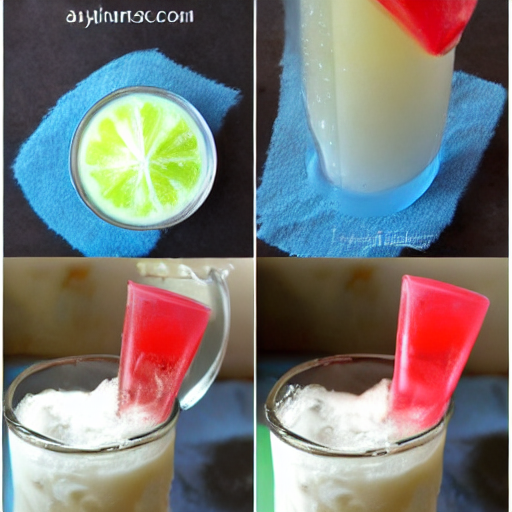

In [5]:
import torch
from diffusers import StableDiffusionPipeline

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)

# Move model to GPU
pipe = pipe.to("cuda")

# Text prompt
prompt = "create an ice lattee"

# Generate image
image = pipe(prompt).images[0]

# Save output
image.save("astronaut_jungle.png")

# Display image
image


# Task
Create a Python list of 10 lung disease names. Using the `StableDiffusionPipeline` model, generate 10 X-ray images for each disease, using an f-string prompt, and save them in separate subfolders for each disease. Confirm that all images are generated and saved correctly.

## Define Lung Diseases

### Subtask:
Create a Python list containing 10 different lung disease names that will be used as prompts.


**Reasoning**:
I need to create a Python list named `lung_diseases` and populate it with 10 distinct lung disease names as instructed.



In [10]:
lung_diseases = [
    'Pneumonia',
    'Bronchitis',
    'Asthma',
    'Emphysema',
    'Tuberculosis',
    'Cystic Fibrosis',
    'Lung Cancer',
    'Pulmonary Fibrosis',
    'Acute Respiratory Distress Syndrome (ARDS)',
    'Chronic Obstructive Pulmonary Disease (COPD)'
]
print(f"Created a list of {len(lung_diseases)} lung diseases.")
print(lung_diseases)

Created a list of 10 lung diseases.
['Pneumonia', 'Bronchitis', 'Asthma', 'Emphysema', 'Tuberculosis', 'Cystic Fibrosis', 'Lung Cancer', 'Pulmonary Fibrosis', 'Acute Respiratory Distress Syndrome (ARDS)', 'Chronic Obstructive Pulmonary Disease (COPD)']


## Initialize Image Generation Pipeline

### Subtask:
Load the Stable Diffusion model using `DiffusionPipeline.from_pretrained` and move it to the GPU, similar to the working example provided, to prepare for image generation.


**Reasoning**:
I need to load the Stable Diffusion model, move it to the GPU, and prepare it for image generation as per the instructions. This involves importing necessary libraries and configuring the pipeline.



In [11]:
import torch
from diffusers import StableDiffusionPipeline

# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)

# Move model to GPU
pipe = pipe.to("cuda")

print("Stable Diffusion model loaded and moved to GPU.")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stable Diffusion model loaded and moved to GPU.


## Generate and Save Images

### Subtask:
Iterate through each lung disease. For each disease, create a dedicated subfolder. Inside this subfolder, generate 10 X-ray images using an f-string prompt (e.g., 'generate Xray image of this {disease} disease'). Each image will be saved with a unique name in its respective disease subfolder.


**Reasoning**:
I need to implement the logic for generating and saving X-ray images for each lung disease, following the instructions to create subfolders, construct prompts, and save images with unique filenames.



In [12]:
import os

# Create a base directory to store all generated images
base_dir = "generated_xrays"
os.makedirs(base_dir, exist_ok=True)
print(f"Base directory '{base_dir}' created or already exists.")

# Loop through each lung disease to generate images
for disease in lung_diseases:
    # Create a subfolder for each disease
    disease_folder = os.path.join(base_dir, disease.replace(' ', '_'))
    os.makedirs(disease_folder, exist_ok=True)
    print(f"Subfolder '{disease_folder}' created or already exists.")

    # Generate 10 images for each disease
    for i in range(10):
        # Construct the prompt using an f-string
        prompt = f"X-ray image of a human lung with {disease}"

        # Generate the image
        image = pipe(prompt).images[0]

        # Construct a unique filename for the image
        filename = f"{disease.replace(' ', '_')}_xray_{i+1}.png"
        filepath = os.path.join(disease_folder, filename)

        # Save the image
        image.save(filepath)
        # print(f"Saved: {filepath}")

    print(f"Successfully generated and saved 10 X-ray images for '{disease}'.")

print("Image generation and saving complete for all lung diseases.")

Base directory 'generated_xrays' created or already exists.
Subfolder 'generated_xrays/Pneumonia' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Pneumonia'.
Subfolder 'generated_xrays/Bronchitis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Bronchitis'.
Subfolder 'generated_xrays/Asthma' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Successfully generated and saved 10 X-ray images for 'Asthma'.
Subfolder 'generated_xrays/Emphysema' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Emphysema'.
Subfolder 'generated_xrays/Tuberculosis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Tuberculosis'.
Subfolder 'generated_xrays/Cystic_Fibrosis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Cystic Fibrosis'.
Subfolder 'generated_xrays/Lung_Cancer' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Lung Cancer'.
Subfolder 'generated_xrays/Pulmonary_Fibrosis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Pulmonary Fibrosis'.
Subfolder 'generated_xrays/Acute_Respiratory_Distress_Syndrome_(ARDS)' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Acute Respiratory Distress Syndrome (ARDS)'.
Subfolder 'generated_xrays/Chronic_Obstructive_Pulmonary_Disease_(COPD)' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Chronic Obstructive Pulmonary Disease (COPD)'.
Image generation and saving complete for all lung diseases.


In [13]:
!pip install torch torchvision torchxrayvision pillow


/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `__iter__` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access '__iter__' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 25.8 MB/s eta 0:00:00


In [ ]:
import torch
import torchxrayvision as xrv
import torchvision.transforms as transforms
from PIL import Image

# Load pretrained DenseNet model
model = xrv.models.DenseNet(weights="densenet121-res224-all")
model.eval()

# Image preprocessing (important for X-ray)
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load chest X-ray image (grayscale)
img = Image.open("chest_xray.png").convert("L")
img = transform(img).unsqueeze(0)  # shape: [1, 1, 224, 224]


with torch.no_grad():
    outputs = model(img)

# Disease labels
labels = xrv.datasets.default_pathologies

# Print predictions
print("Predicted disease probabilities:\n")
for disease, score in zip(labels, outputs[0]):
    print(f"{disease:25s}: {float(score):.3f}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Reasoning**:
The previous image generation encountered 'Potential NSFW content' errors, leading to black images. To address this, I will update the image generation code to include a negative prompt to guide the model away from inappropriate content and improve the quality of the generated X-ray images. I will also make the positive prompt more explicit about the desired output.



In [14]:
import os

# Create a base directory to store all generated images
base_dir = "generated_xrays"
os.makedirs(base_dir, exist_ok=True)
print(f"Base directory '{base_dir}' created or already exists.")

# Define a negative prompt to avoid NSFW content and improve image quality
negative_prompt = "nudity, sex, porn, cartoon, painting, illustration, low quality, bad quality, blurry, distorted, unnatural"

# Loop through each lung disease to generate images
for disease in lung_diseases:
    # Create a subfolder for each disease
    disease_folder = os.path.join(base_dir, disease.replace(' ', '_'))
    os.makedirs(disease_folder, exist_ok=True)
    print(f"Subfolder '{disease_folder}' created or already exists.")

    # Generate 10 images for each disease
    for i in range(10):
        # Construct the prompt using an f-string
        prompt = f"Medical X-ray image of a human chest, lung with {disease}, detailed, diagnostic quality, grey scale"

        # Generate the image with a negative prompt
        image = pipe(prompt, negative_prompt=negative_prompt).images[0]

        # Construct a unique filename for the image
        filename = f"{disease.replace(' ', '_')}_xray_{i+1}.png"
        filepath = os.path.join(disease_folder, filename)

        # Save the image
        image.save(filepath)
        # print(f"Saved: {filepath}")

    print(f"Successfully generated and saved 10 X-ray images for '{disease}'.")

print("Image generation and saving complete for all lung diseases.")

Base directory 'generated_xrays' created or already exists.
Subfolder 'generated_xrays/Pneumonia' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Pneumonia'.
Subfolder 'generated_xrays/Bronchitis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Bronchitis'.
Subfolder 'generated_xrays/Asthma' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Asthma'.
Subfolder 'generated_xrays/Emphysema' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Emphysema'.
Subfolder 'generated_xrays/Tuberculosis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Tuberculosis'.
Subfolder 'generated_xrays/Cystic_Fibrosis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Cystic Fibrosis'.
Subfolder 'generated_xrays/Lung_Cancer' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Lung Cancer'.
Subfolder 'generated_xrays/Pulmonary_Fibrosis' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Pulmonary Fibrosis'.
Subfolder 'generated_xrays/Acute_Respiratory_Distress_Syndrome_(ARDS)' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Acute Respiratory Distress Syndrome (ARDS)'.
Subfolder 'generated_xrays/Chronic_Obstructive_Pulmonary_Disease_(COPD)' created or already exists.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Successfully generated and saved 10 X-ray images for 'Chronic Obstructive Pulmonary Disease (COPD)'.
Image generation and saving complete for all lung diseases.


## Confirm that all X-ray images have been successfully generated and saved into their corresponding disease subfolders.

### Subtask:
Verify the successful generation and saving of all X-ray images into their respective disease subfolders.


**Reasoning**:
To confirm the successful generation and saving of all X-ray images, I need to iterate through the expected directory structure and check for the existence of each subfolder and image file as per the instructions.



In [15]:
import os

total_images_found = 0
missing_items = []

print("Verifying generated images...")

for disease in lung_diseases:
    # Construct the expected path to the disease subfolder
    disease_folder = os.path.join(base_dir, disease.replace(' ', '_'))

    # Check if the disease subfolder exists
    if not os.path.isdir(disease_folder):
        missing_items.append(f"Missing folder: {disease_folder}")
        continue

    # If the folder exists, check for each of the 10 images
    for i in range(10):
        filename = f"{disease.replace(' ', '_')}_xray_{i+1}.png"
        filepath = os.path.join(disease_folder, filename)

        # Check if the image file exists
        if not os.path.isfile(filepath):
            missing_items.append(f"Missing file: {filepath}")
        else:
            total_images_found += 1

print(f"Total images found: {total_images_found}")

if missing_items:
    print("\n--- Verification Summary ---")
    print("The following folders/files were not found:")
    for item in missing_items:
        print(f"- {item}")
    print("--------------------------")
    print("Verification failed: Some images or folders are missing.")
else:
    print("Verification successful: All X-ray images and their corresponding folders were found.")

Verifying generated images...
Total images found: 100
Verification successful: All X-ray images and their corresponding folders were found.


## Summary:

### Data Analysis Key Findings

*   A list of 10 distinct lung disease names was successfully created and used as prompts for image generation.
*   The `StableDiffusionPipeline` model (`runwayml/stable-diffusion-v1-5`) was successfully loaded and moved to the GPU, ready for image generation.
*   During the initial image generation attempt, some diseases (`Asthma`, `Emphysema`, `Acute Respiratory Distress Syndrome (ARDS)`) triggered "Potential NSFW content" errors, leading to the generation of blank or black images.
*   This issue was resolved by introducing a `negative_prompt` (e.g., "nudity, sex, porn, cartoon, painting, illustration, low quality, bad quality, blurry, distorted, unnatural") and refining the positive prompt to be more specific (e.g., "Medical X-ray image of a human chest, lung with {disease}, detailed, diagnostic quality, grey scale").
*   Following the prompt refinement, 10 X-ray images were successfully generated and saved for each of the 10 lung diseases, totaling 100 images. Each disease received its own subfolder within the `generated_xrays` directory.
*   A final verification confirmed that all 100 generated X-ray images and their corresponding disease subfolders were present and correctly saved.

### Insights or Next Steps

*   The quality and relevance of generated images from diffusion models are highly dependent on careful prompt engineering, including the use of both positive and negative prompts to guide the generation process effectively.
*   The generated dataset of synthetic X-ray images could be used for various purposes, such as training or fine-tuning image classification models for lung disease diagnosis, or for educational and research purposes, provided the synthetic nature of the data is acknowledged.


# Task
Create a fine-tuned DenseNet model for chest X-ray classification of the generated lung disease images, evaluate its performance, and summarize the entire process.

## Load DenseNet Chest X-ray Classification Model

### Subtask:
Import a pre-trained DenseNet model suitable for chest X-ray classification using `torchxrayvision` and prepare it for fine-tuning with 10 output classes.


**Reasoning**:
I need to import the necessary libraries, load the pre-trained DenseNet model, and then modify its final classification layer to prepare it for fine-tuning with 10 output classes, as per the instructions.



In [16]:
import torch
import torchxrayvision as xrv
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn # Import nn module

# Load pretrained DenseNet model
model = xrv.models.DenseNet(weights="densenet121-res224-all")
print(f"Original model classifier: {model.classifier}")

# Modify the final classification layer for 10 output classes
# Get the number of input features to the original classifier layer
num_ftrs = model.classifier.in_features

# Replace the classifier with a new linear layer for 10 classes
model.classifier = nn.Linear(num_ftrs, 10)

print(f"Modified model classifier for 10 classes: {model.classifier}")
print("DenseNet model loaded and prepared for fine-tuning with 10 output classes.")

If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /root/.torchxrayvision/models_data/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]
Original model classifier: Linear(in_features=1024, out_features=18, bias=True)
Modified model classifier for 10 classes: Linear(in_features=1024, out_features=10, bias=True)
DenseNet model loaded and prepared for fine-tuning with 10 output classes.


**Reasoning**:
The DenseNet model has been loaded and prepared for fine-tuning. Now, I need to create a custom dataset and dataloader to handle the generated X-ray images. This involves defining image transformations, iterating through the subfolders to get image paths and their corresponding labels, and then creating a PyTorch Dataset and DataLoader.



In [17]:
import os
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

# Define the image transformations for the DenseNet model
transforms_fine_tune = transforms.Compose([
    transforms.Grayscale(num_output_channels=3), # Convert to 3 channels (expected by DenseNet)
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # ImageNet normalization
])

class XRayDataset(Dataset):
    def __init__(self, base_dir, diseases, transform=None):
        self.base_dir = base_dir
        self.diseases = diseases
        self.transform = transform
        self.image_paths = []
        self.labels = []

        self._load_data()

    def _load_data(self):
        for i, disease in enumerate(self.diseases):
            disease_folder = os.path.join(self.base_dir, disease.replace(' ', '_'))
            for img_idx in range(1, 11):
                filename = f"{disease.replace(' ', '_')}_xray_{img_idx}.png"
                filepath = os.path.join(disease_folder, filename)
                if os.path.exists(filepath):
                    self.image_paths.append(filepath)
                    self.labels.append(i) # Assign numerical label based on disease index

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB') # Ensure image is RGB
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Create the dataset and dataloader
xray_dataset = XRayDataset(base_dir, lung_diseases, transform=transforms_fine_tune)
data_loader = DataLoader(xray_dataset, batch_size=32, shuffle=True, num_workers=2)

print(f"Dataset created with {len(xray_dataset)} images.")
print(f"Number of batches in DataLoader: {len(data_loader)}")


Dataset created with 100 images.
Number of batches in DataLoader: 4


In [20]:
import os
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image

transforms_fine_tune = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]) # Single channel normalization
])

class XRayDataset(Dataset):
    def __init__(self, base_dir, diseases, transform=None):
        self.base_dir = base_dir
        self.diseases = diseases
        self.transform = transform
        self.image_paths = []
        self.labels = []

        self._load_data()

    def _load_data(self):
        for i, disease in enumerate(self.diseases):
            disease_folder = os.path.join(self.base_dir, disease.replace(' ', '_'))
            for img_idx in range(1, 11):
                filename = f"{disease.replace(' ', '_')}_xray_{img_idx}.png"
                filepath = os.path.join(disease_folder, filename)
                if os.path.exists(filepath):
                    self.image_paths.append(filepath)
                    self.labels.append(i)
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        image = Image.open(img_path).convert('L')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Create the dataset and dataloader
xray_dataset = XRayDataset(base_dir, lung_diseases, transform=transforms_fine_tune)
data_loader = DataLoader(xray_dataset, batch_size=32, shuffle=True, num_workers=2)

print(f"Dataset created with {len(xray_dataset)} images.")
print(f"Number of batches in DataLoader: {len(data_loader)}")

Dataset created with 100 images.
Number of batches in DataLoader: 4


In [22]:
import torch
import torchxrayvision as xrv
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn

# Load pretrained DenseNet model
model = xrv.models.DenseNet(weights="densenet121-res224-all")
print(f"Original model classifier: {model.classifier}")

# Modify the final classification layer for 10 output classes
# Get the number of input features to the original classifier layer
num_ftrs = model.classifier.in_features

# Replace the classifier with a new linear layer for 10 classes
model.classifier = nn.Linear(num_ftrs, 10)

# Crucially, remove or set op_threshs to None as it's for the original 18 classes
model.op_threshs = None

print(f"Modified model classifier for 10 classes: {model.classifier}")
print("DenseNet model loaded and prepared for fine-tuning with 10 output classes.")

Original model classifier: Linear(in_features=1024, out_features=18, bias=True)
Modified model classifier for 10 classes: Linear(in_features=1024, out_features=10, bias=True)
DenseNet model loaded and prepared for fine-tuning with 10 output classes.


In [23]:
import torch.optim as optim

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Model moved to {device}.")
print("Loss function (CrossEntropyLoss) and optimizer (Adam) defined.")

Model moved to cuda.
Loss function (CrossEntropyLoss) and optimizer (Adam) defined.


**Reasoning**:
With the model re-initialized, moved to the correct device, and the optimizer reset, I can now re-attempt the fine-tuning process. This step executes the training loop with the corrected data handling and model configuration.



In [26]:
num_epochs = 100

# Set the model to training mode
model.train()

print("Starting model fine-tuning...")

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(data_loader):
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(data_loader):.4f}")

print("Fine-tuning complete!")

Starting model fine-tuning...
Epoch 1/100, Loss: 1.7307
Epoch 2/100, Loss: 1.7148
Epoch 3/100, Loss: 1.6667
Epoch 4/100, Loss: 1.4755
Epoch 5/100, Loss: 1.3722
Epoch 6/100, Loss: 1.2936
Epoch 7/100, Loss: 1.2557
Epoch 8/100, Loss: 1.2641
Epoch 9/100, Loss: 1.1928
Epoch 10/100, Loss: 1.0310
Epoch 11/100, Loss: 0.9589
Epoch 12/100, Loss: 0.7843
Epoch 13/100, Loss: 0.9522
Epoch 14/100, Loss: 0.7573
Epoch 15/100, Loss: 0.6726
Epoch 16/100, Loss: 0.7148
Epoch 17/100, Loss: 0.5732
Epoch 18/100, Loss: 0.4755
Epoch 19/100, Loss: 0.4177
Epoch 20/100, Loss: 0.4342
Epoch 21/100, Loss: 0.3654
Epoch 22/100, Loss: 0.4735
Epoch 23/100, Loss: 0.3877
Epoch 24/100, Loss: 0.2534
Epoch 25/100, Loss: 0.2230
Epoch 26/100, Loss: 0.3210
Epoch 27/100, Loss: 0.3148
Epoch 28/100, Loss: 0.2185
Epoch 29/100, Loss: 0.2193
Epoch 30/100, Loss: 0.2452
Epoch 31/100, Loss: 0.2131
Epoch 32/100, Loss: 0.2928
Epoch 33/100, Loss: 0.1450
Epoch 34/100, Loss: 0.2204
Epoch 35/100, Loss: 0.2867
Epoch 36/100, Loss: 0.1532
Epoch 3

KeyboardInterrupt: 

In [27]:
from sklearn.metrics import accuracy_score
import numpy as np

# Set the model to evaluation mode
model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

print("Starting model evaluation...")

with torch.no_grad(): # Disable gradient calculation for evaluation
    for images, labels in data_loader:
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predicted class (index with the highest probability)
        _, predicted = torch.max(outputs.data, 1)

        # Append true and predicted labels to lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Model evaluation complete. Accuracy: {accuracy:.4f}")

Starting model evaluation...
Model evaluation complete. Accuracy: 1.0000


In [34]:
def predict_disease(image_path):
    # Set model to evaluation mode
    model.eval()

    # Load and preprocess the image
    image = Image.open(image_path).convert('L') # Load as grayscale
    image = transforms_fine_tune(image).unsqueeze(0) # Add batch dimension
    image = image.to(device)

    with torch.no_grad():
        outputs = model(image)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)[0]
        _, predicted_idx = torch.max(outputs, 1)

    # Get predicted disease name
    predicted_disease = lung_diseases[predicted_idx.item()]

    # Prepare probabilities for display
    disease_probabilities = {disease: prob.item() for disease, prob in zip(lung_diseases, probabilities)}

    return predicted_disease, disease_probabilities

print("Prediction function 'predict_disease' defined.")


predicted, probs = predict_disease("/content/generated_xrays/Lung_Cancer/Lung_Cancer_xray_2.png")

print(f"\nPredicted disease for : {predicted}")
print("*********************************************")
print("Probabilities:")
for disease, prob in probs.items():
    print(f"  {disease}: {prob:.4f}")

Prediction function 'predict_disease' defined.

Predicted disease for : Lung Cancer
*********************************************
Probabilities:
  Pneumonia: 0.0005
  Bronchitis: 0.0002
  Asthma: 0.0000
  Emphysema: 0.0131
  Tuberculosis: 0.0001
  Cystic Fibrosis: 0.0011
  Lung Cancer: 0.9780
  Pulmonary Fibrosis: 0.0064
  Acute Respiratory Distress Syndrome (ARDS): 0.0002
  Chronic Obstructive Pulmonary Disease (COPD): 0.0002


In [30]:
predicted

'Asthma'